# Exercise 2


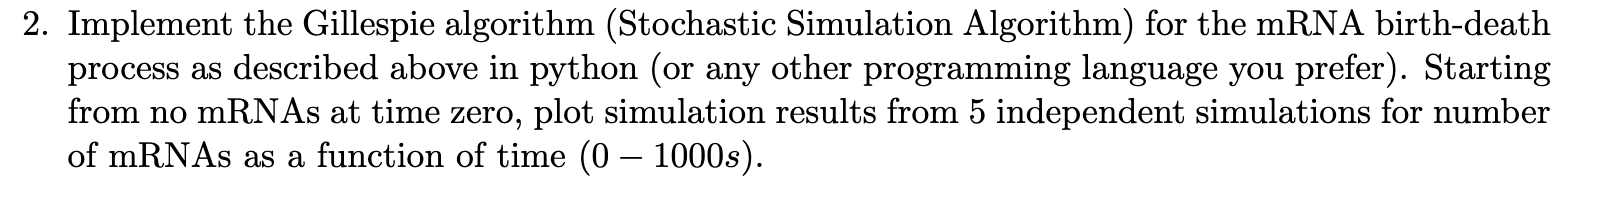


In [2]:
from ssa import SSA

In [3]:
max_time_sec = 1000
timestep_sec = 0.1
timesteps = int(max_time_sec / timestep_sec)

k0 = 0.2
k1 = 0.01

ssa = SSA(k0_production_rate_const=k0, k1_degradation_rate_const=k1)

print(f"{timesteps=}")

timesteps=10000


In [4]:
simulation_results = []

for i in range(5):
    print(f"Starting simulation no. {i} ...")
    simulation_results.append(
        ssa.run_simulation(
            timesteps=timesteps,
            initial_mRNA_level=0,
            start_time=0.0,
            timestep_sec=timestep_sec,
        )
    )

Starting simulation no. 0 ...
Starting simulation no. 1 ...
Starting simulation no. 2 ...
Starting simulation no. 3 ...
Starting simulation no. 4 ...


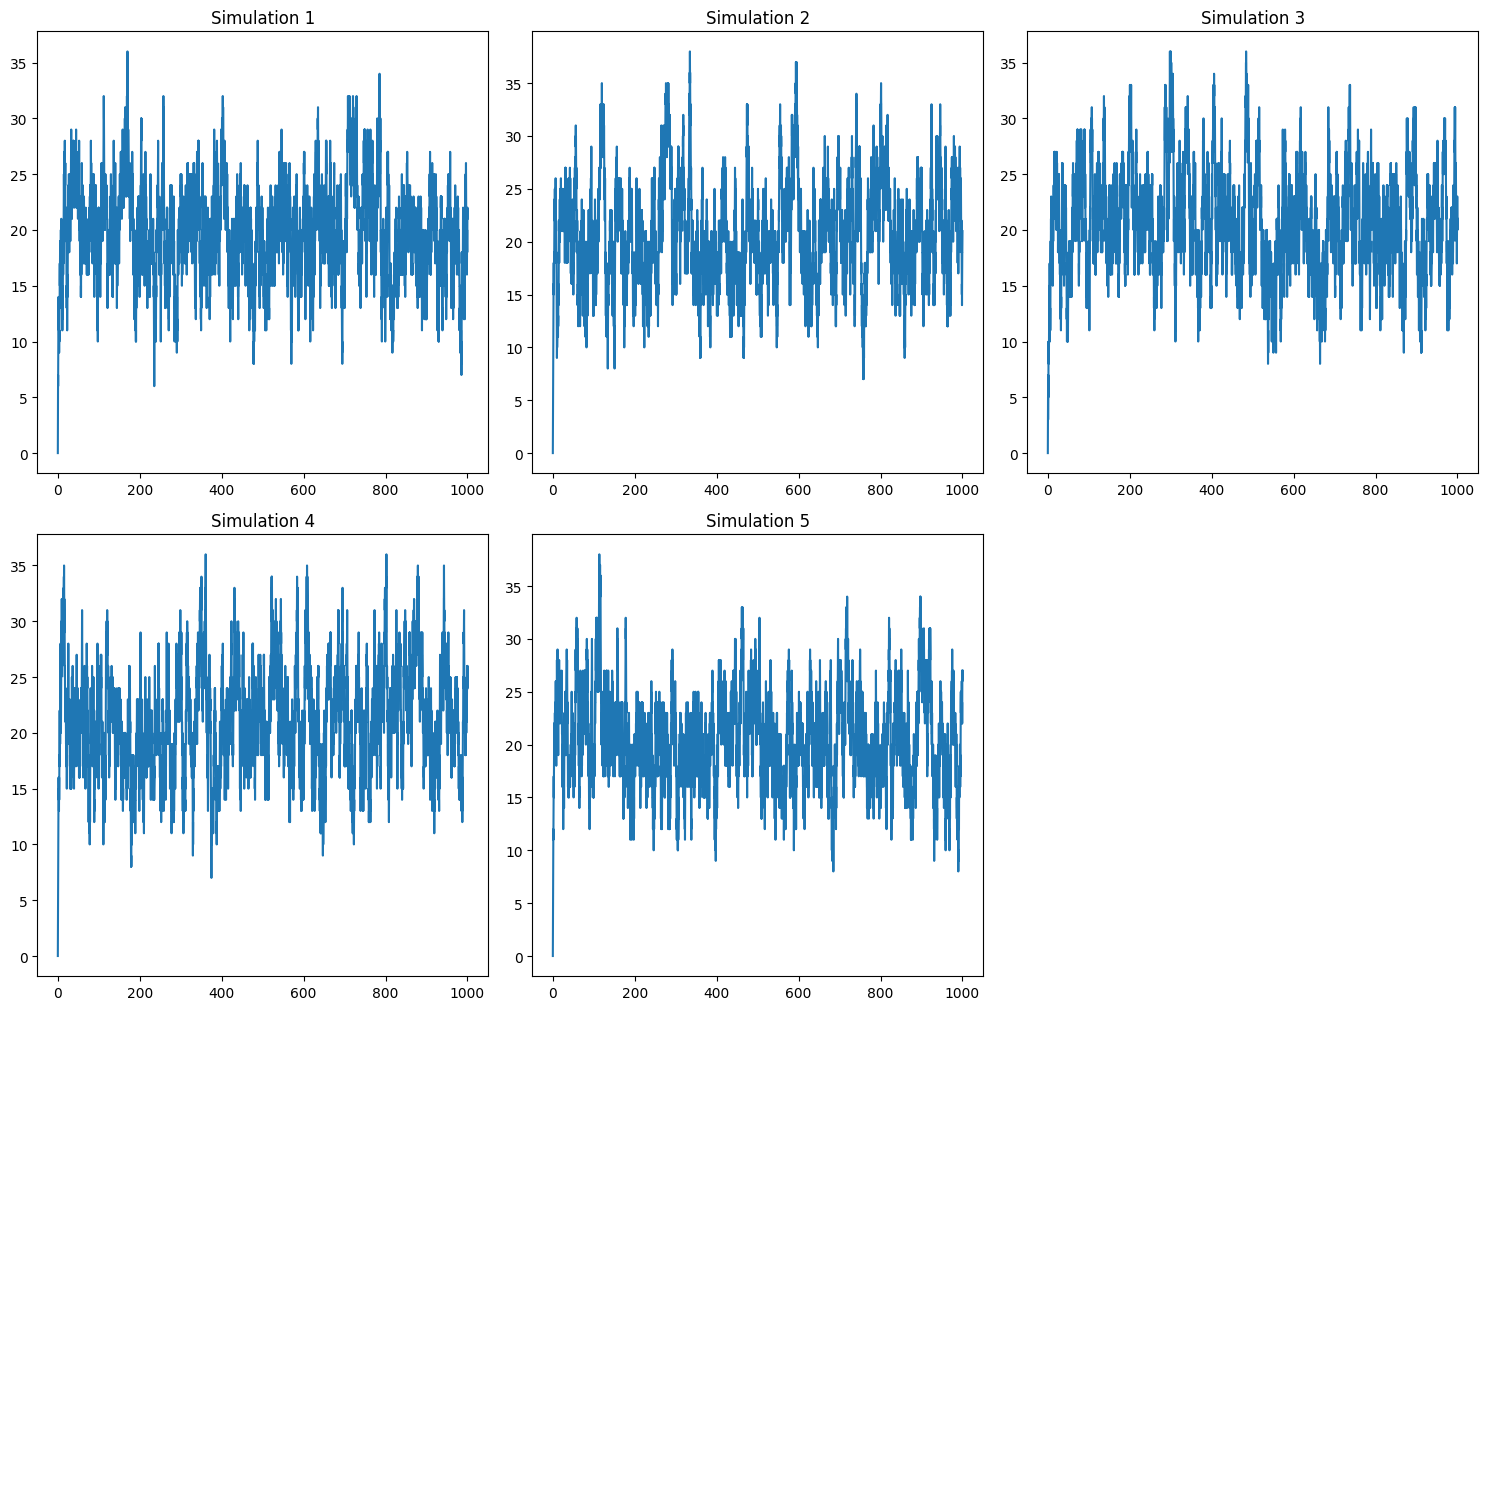

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Number of simulations
num_sims = len(simulation_results)

# Determine the grid size (for example, square root rounded up for both rows and columns)
grid_size = int(np.ceil(np.sqrt(num_sims)))

# Create subplots
fig, axs = plt.subplots(grid_size, grid_size, figsize=(
    15, 15))  # Adjust figsize as needed

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plot each simulation
for i, sim in enumerate(simulation_results):
    time, mrna = sim
    axs[i].plot(time, mrna)
    axs[i].set_title(f'Simulation {i+1}')  # Set the title for each subplot

# Hide any unused subplots
for i in range(num_sims, len(axs)):
    axs[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [7]:
# save simulations to json

import json

with open("ex2_sims.json", "w") as f:
    f.write(json.dumps(simulation_results))